## *santoshhulbutti@gmail.com | DataTrained | Evaluation Project # 09

## Insurance Claim Fraud Detection

<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)

import statsmodels.api as sm

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

#logistic Regression
from sklearn.linear_model import LogisticRegression

# Ensemble models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#C-Support Vector Classification
from sklearn.svm import SVC

# naive bayes model
from sklearn.naive_bayes import GaussianNB

# Classifiction metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc



# from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV

# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# from sklearn.tree import DecisionTreeRegressor

# from sklearn.svm import SVR

# from sklearn.neighbors import KNeighborsRegressor

# from xgboost import XGBRegressor

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [310]:
data_url = "Automobile_insurance_fraud.csv"

data0 = pd.read_csv(data_url)

<h1 align="center"><font color = "red">Data Preprocessing, Visualization & EDA</font> </h1>

# Initial data Analysis

In [311]:
data0

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [312]:
unique_null_data = pd.DataFrame(list(zip(data0.nunique(), data0.isnull().sum(), data0.dtypes)),
                                columns = ['unique_entries', 'missing values', 'Dtypes'],
                               index=data0.columns)
unique_null_data

,unique_entries,missing values,Dtypes
months_as_customer,391,0,int64
age,46,0,int64
policy_number,1000,0,int64
policy_bind_date,951,0,object
policy_state,3,0,object
policy_csl,3,0,object
policy_deductable,3,0,int64
policy_annual_premium,991,0,float64
umbrella_limit,11,0,int64
insured_zip,995,0,int64


In [313]:
data0.dtypes.value_counts()

object     21
int64      17
float64     2
dtype: int64

### Observation:
The data set has 1000 rows of data & 40 Columns.

1. there are 2 float type of feature.
2. 21 features of object datatype consisting time series, ordinal & nominal categories.
3. 17 features are of int data type.
3. fraud_reported feature(Traget variable) is also object datatype. here it is nominal data type.
4. _c39 is a empty column. we weill remove it.
5. there are no missing values in the dataset.

In [117]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
data0=data0.replace('?',np.nan)

In [118]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39']

In [119]:
# dropping the unnecessary columns
data0.drop(columns=cols_to_drop,inplace=True)

In [156]:
data0.duplicated().sum()

0

In [120]:
data0.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [121]:
data0.shape

(1000, 27)

In [122]:
unique_null_data = pd.DataFrame(list(zip(data0.nunique(), data0.isnull().sum(), data0.dtypes)),
                                columns = ['unique_entries', 'missing values', 'Dtypes'],
                               index=data0.columns)
unique_null_data

,unique_entries,missing values,Dtypes
months_as_customer,391,0,int64
age,46,0,int64
policy_csl,3,0,object
policy_deductable,3,0,int64
policy_annual_premium,991,0,float64
umbrella_limit,11,0,int64
insured_sex,2,0,object
insured_education_level,7,0,object
insured_occupation,14,0,object
insured_relationship,6,0,object


## Imputing missing values in categorical features

In [123]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [124]:
# imputing the missing values from the column
data0['collision_type']=imputer.fit_transform(data0['collision_type'])
data0['property_damage']=imputer.fit_transform(data0['property_damage'])
data0['police_report_available']=imputer.fit_transform(data0['police_report_available'])

In [126]:
# Extracting the categorical columns
data0_cat = data0.select_dtypes(include=['object']).copy()

In [127]:
# extracting the numerical columns
data0_num = data0.select_dtypes(include=['int64', 'float64']).copy()

In [128]:
discrete_feature=[feature for feature in data0_num if len(data0_num[feature].unique())<25]
discrete_feature

['policy_deductable',
 'umbrella_limit',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses']

## Unique value counts in discrete numerical feature

In [129]:
for feat in discrete_feature:
    print(data0_num[feat].value_counts())
    print(' ')
    print('==============================')

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
 
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64
 
17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64
 
1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64
 
0    340
2    332
1    328
Name: bodily_injuries, dtype: int64
 
1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64
 


In [130]:
#converting negative value in Umbrella limit to positive number
ind = np.where(data0['umbrella_limit'] == -1000000)
ind

(array([290], dtype=int64),)

In [132]:
data0_num.loc[ind[0], 'umbrella_limit'] = 1000000

In [133]:
data0.loc[ind[0], 'umbrella_limit'] = 1000000

In [136]:
data0_cat.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

## Unique value counts in categorical feature

In [137]:
data0_cat['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [138]:
data0_cat['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [139]:
data0_cat['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [140]:
data_eda = pd.concat([data0_num,data0_cat], axis=1)

## Encoding categorical features

In [141]:
# custom mapping for encoding
data0_cat['policy_csl'] = data0_cat['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
data0_cat['insured_education_level'] = data0_cat['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
data0_cat['incident_severity'] = data0_cat['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
data0_cat['insured_sex'] = data0_cat['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
data0_cat['property_damage'] = data0_cat['property_damage'].map({'NO' : 0, 'YES' : 1})
data0_cat['police_report_available'] = data0_cat['police_report_available'].map({'NO' : 0, 'YES' : 1})
data0_cat['fraud_reported'] = data0_cat['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [142]:
# auto encoding of categorical variables
for col in data0_cat.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    data0_cat= pd.get_dummies(data0_cat, columns=[col], prefix = [col], drop_first=True)

In [143]:
# data fter encoding
data0_cat.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


In [144]:
data0_num.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [145]:
# combining the Numerical and categorical dataframes to get the final dataset
data1 = pd.concat([data0_num,data0_cat], axis=1)

In [146]:
data1

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,1.0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,1,87200,17440,8720,61040,5.0,0,4,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,3,108480,18080,18080,72320,1.0,0,7,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,3,67500,7500,7500,52500,2.5,0,4,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
998,458,62,2000,1356.92,5000000,0,0,2,1,0,1,46980,5220,5220,36540,5.0,1,5,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0


In [225]:
num_cols = ['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim']
# cat_cols = []
# for column in data_eda.columns:
#     if column in num_cols:
#         pass
#     else:
#         cat_cols.append(column)

cat_cols = ['policy_csl','insured_sex','umbrella_limit','insured_education_level','insured_occupation','insured_relationship',
            'incident_type','collision_type','incident_severity','authorities_contacted','property_damage',
            'police_report_available','fraud_reported']

<h2 align="center"><font color = "red">EDA : Data Visualization</font> </h2>

### Numerical features :
- months_as_customer
- age
- policy_deductable
- policy_annual_premium
- umbrella_limit
- capital-gains
- capital-loss
- incident_hour_of_the_day
- number_of_vehicles_involved
- bodily_injuries
- witnesses
- total_claim_amount
- injury_claim
- property_claim
- vehicle_claim
### Categorical features :
- policy_csl
- insured_sex
- insured_education_level
- insured_occupation
- insured_relationship
- incident_type
- collision_type
- incident_severity
- authorities_contacted
- property_damage
- police_report_available
- fraud_reported

In [226]:
data1_num = data_eda[num_cols]
data1_cat = data_eda[cat_cols]

In [227]:
print(len(num_cols))
print(len(cat_cols))

14
13


# Univariate, Bivariate & Multivariate Analysis

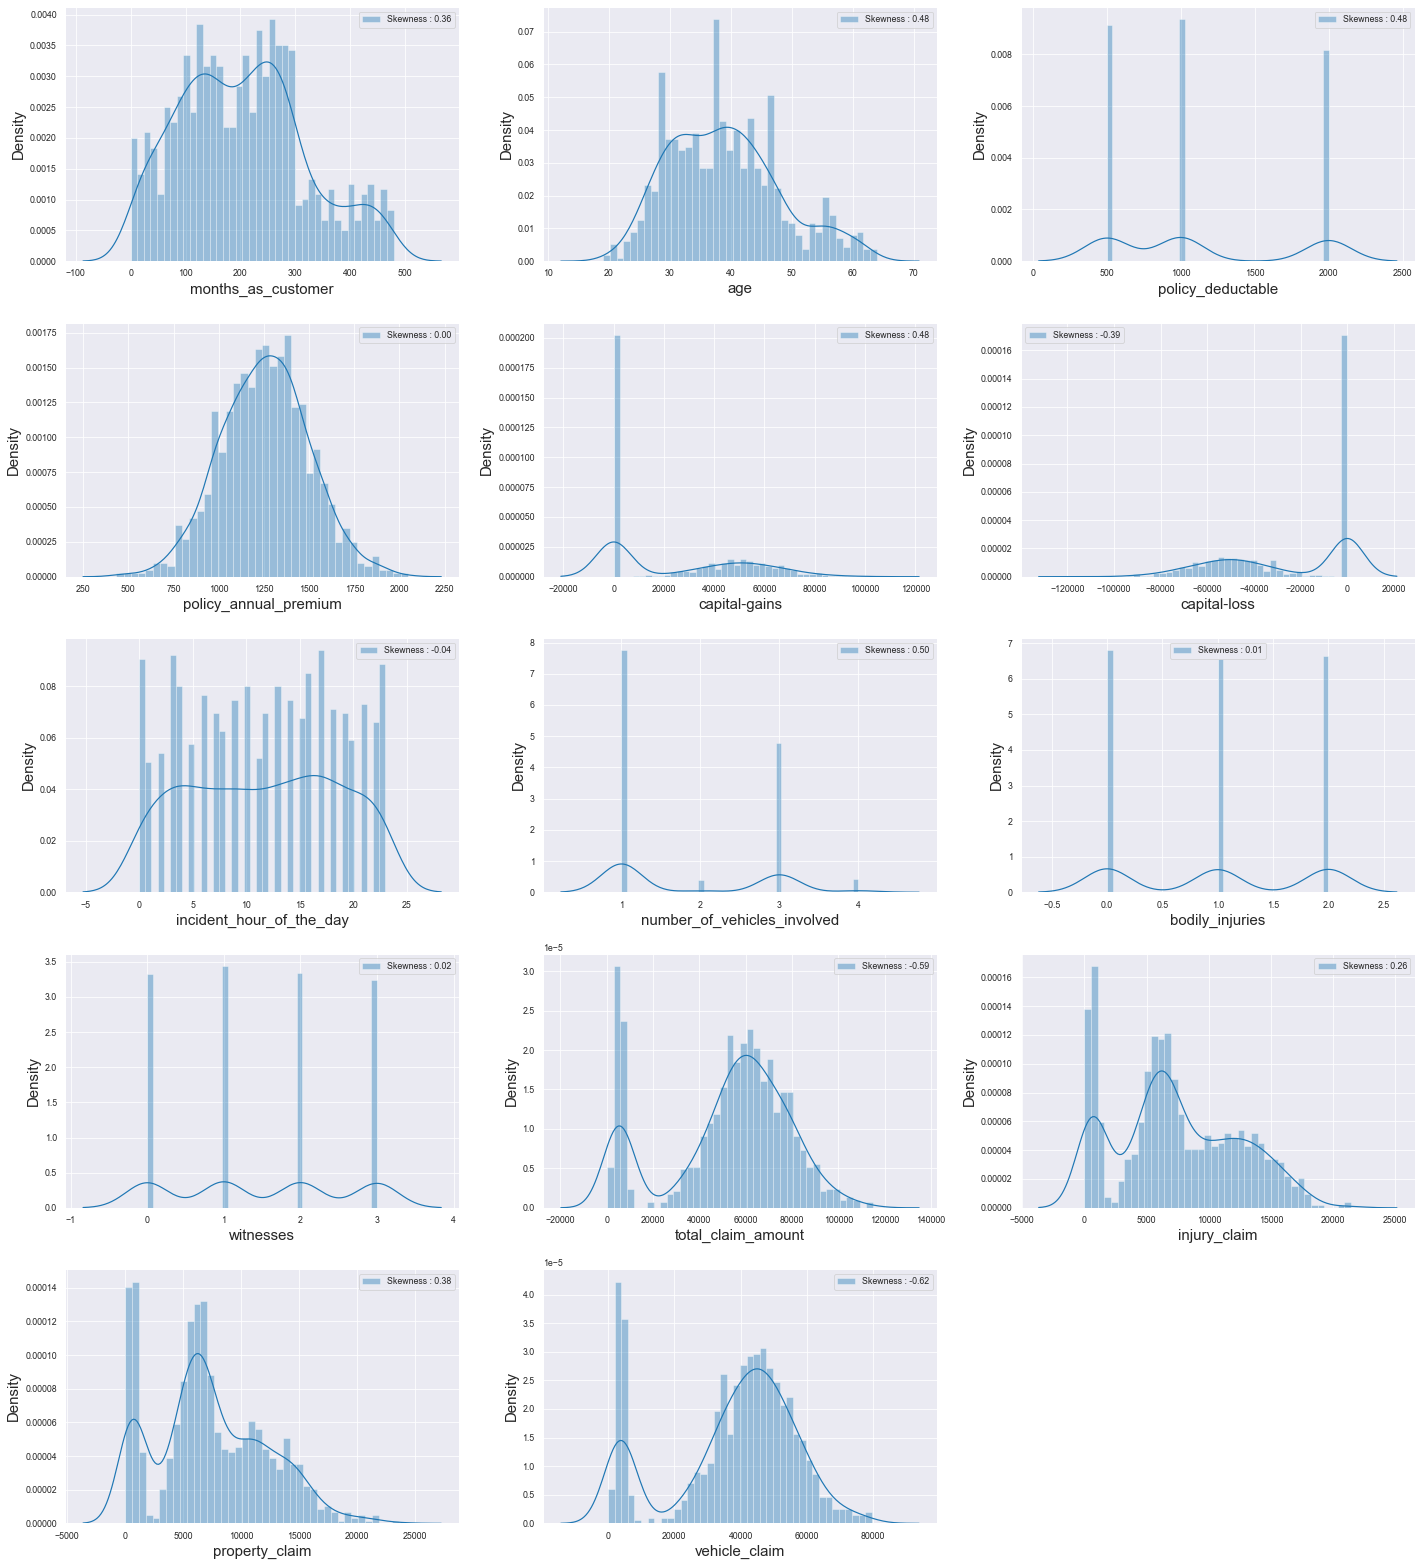

In [228]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(20,22))
for column in data1_num.columns:
    plt.subplot(5,3,i+1)
    sns.distplot(data1_num[column], bins=40, label="Skewness : %.2f"%(data1_num[column].skew())).legend(loc="best")
    plt.xlabel(column,fontsize=15)
    plt.ylabel('Density',fontsize=15)
    i+=1
    
plt.tight_layout()

## Observation:
For continuous features:
1. following features follow close to normal distribution:
    - months_as_customer
    - age
    - policy_annual_premium
    - total_claim_amount
    - injury_claim
    - property_claim
    - vehicle_claim
2. Following features were Descrete dimensions.
    - policy_deductable
    - incident_hour_of_the_day
    - number_of_vehicles_involved
    - bodily_injuries
    - witnesses
    
There are some of outliers in the continuos numerical features.

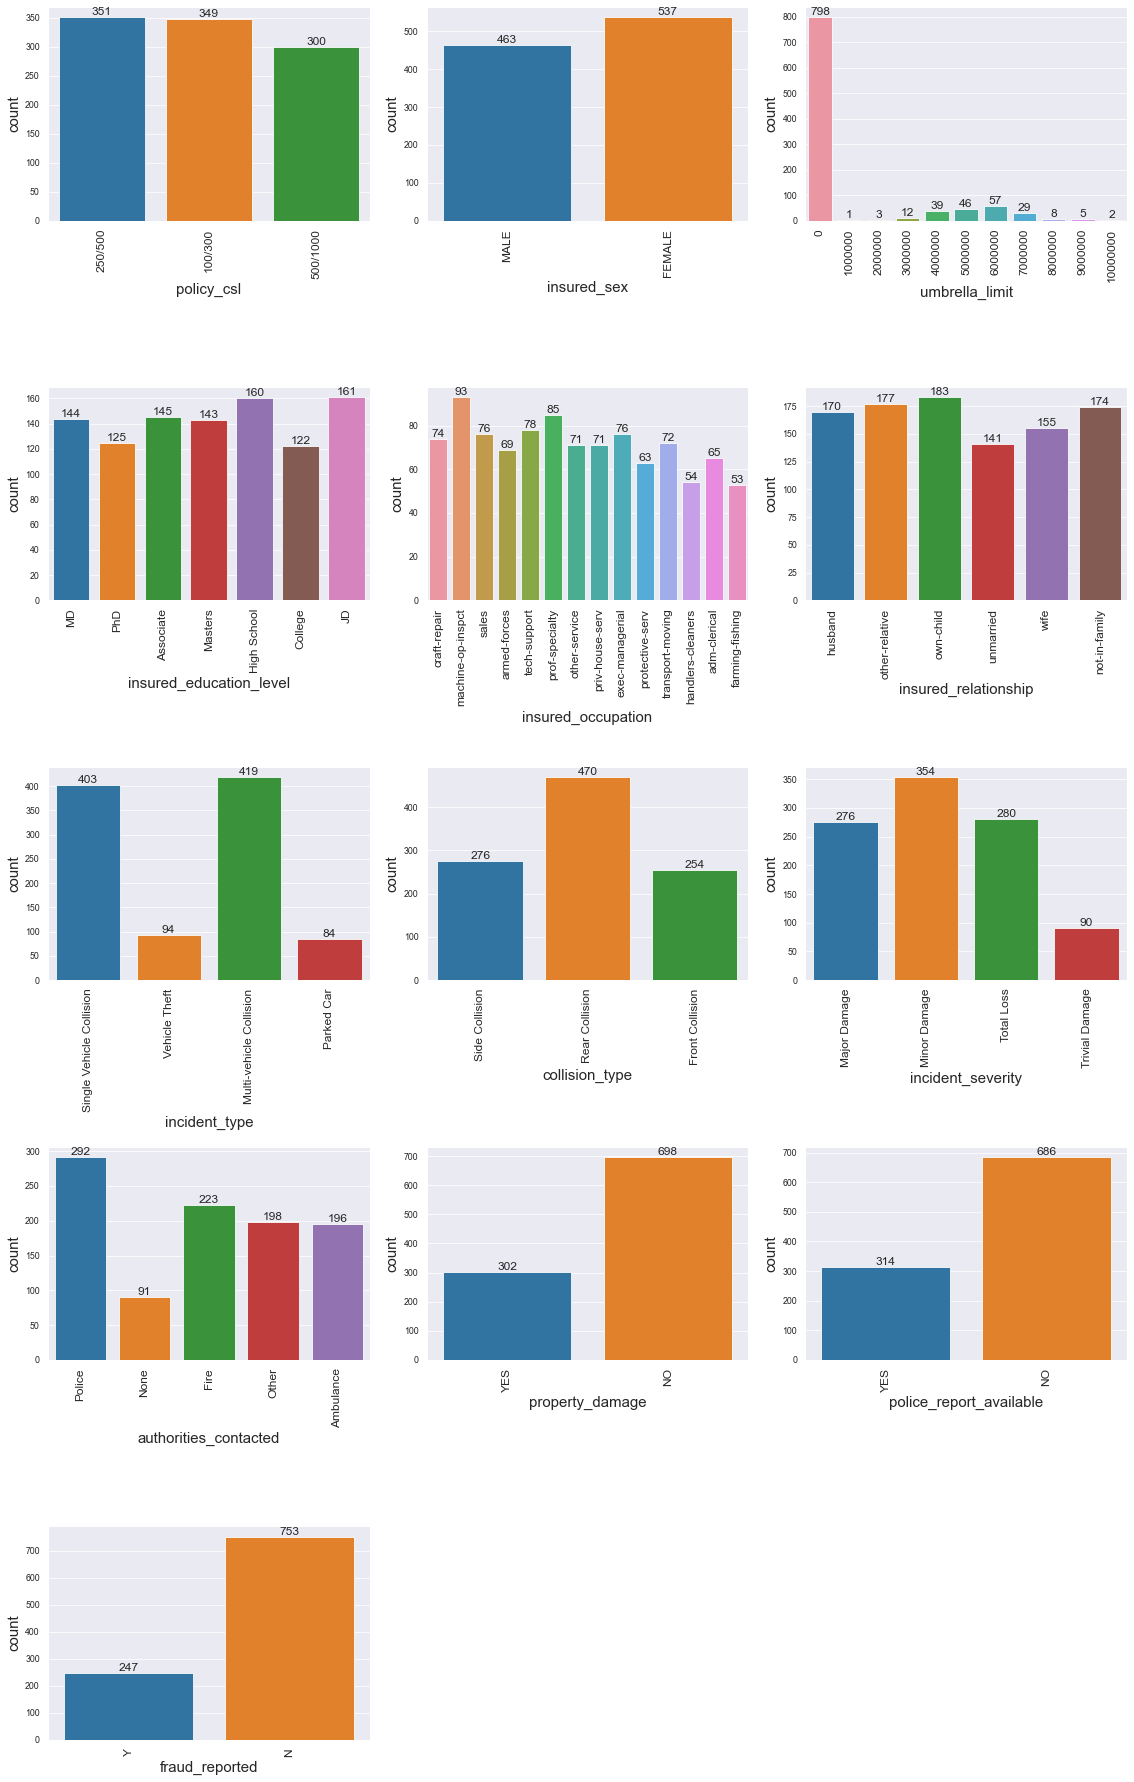

In [232]:
#distribution of numerical features using countplot
i=0
plt.figure(figsize=(16,25))
for column in data1_cat.columns:
    plt.subplot(5,3,i+1)
#     ax = sns.barplot(x=column,data=data1_cat, errwidth=0)
    ax = sns.countplot(x= data1_cat[column])
    ax.bar_label(ax.containers[0], fontsize = 12);
    plt.xticks(fontsize = 12, rotation=90)
    plt.xlabel(column,fontsize=15)
    i+=1
    
plt.tight_layout()

### Observations:
1. ALmost equal number of male & female insurance holder.
2. There were 798 people with 0 umbrella limit.
3. Most occuring incident types were SIngle Vehicle collision & multi vehicle collision.
4. Rear collisions were highest type og collision happened.
5. in given data set Trivial daamges were only 0.9%.
6. Police were the primary authority to contact to whenever accident happen.
7. in about 700 of the cases no damage was observed on propery of thr insured.
8. 686 Number of police report were not avaiable
9. the dataset is biased heavily towards fraud Not repoerted. 

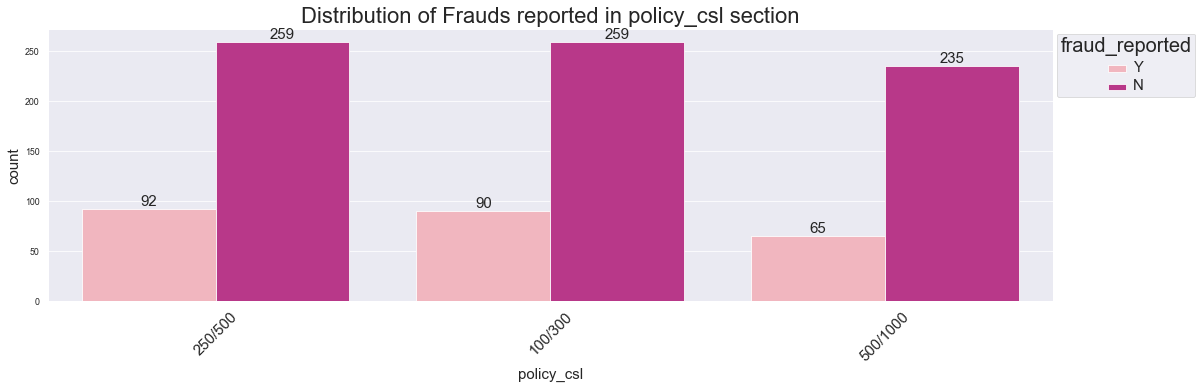

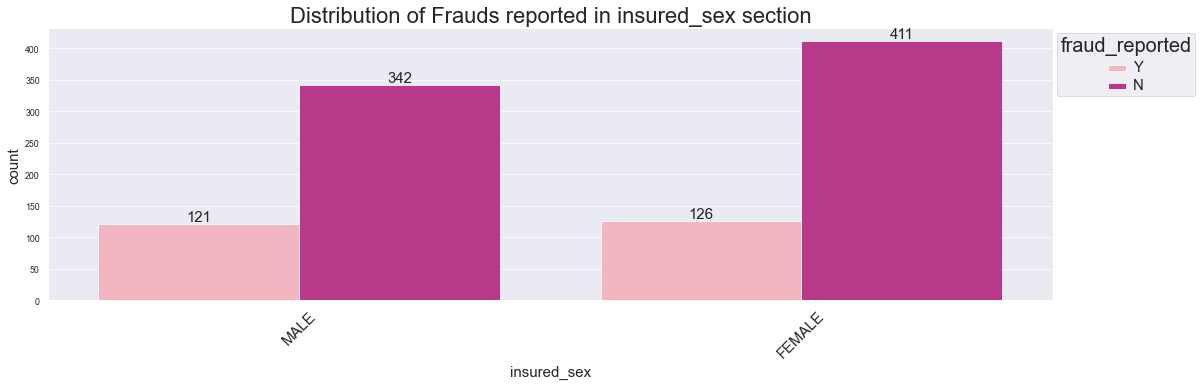

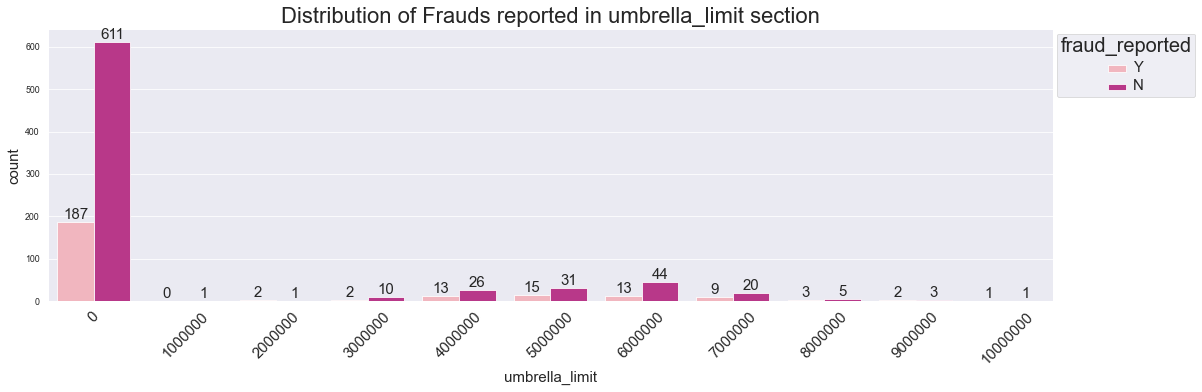

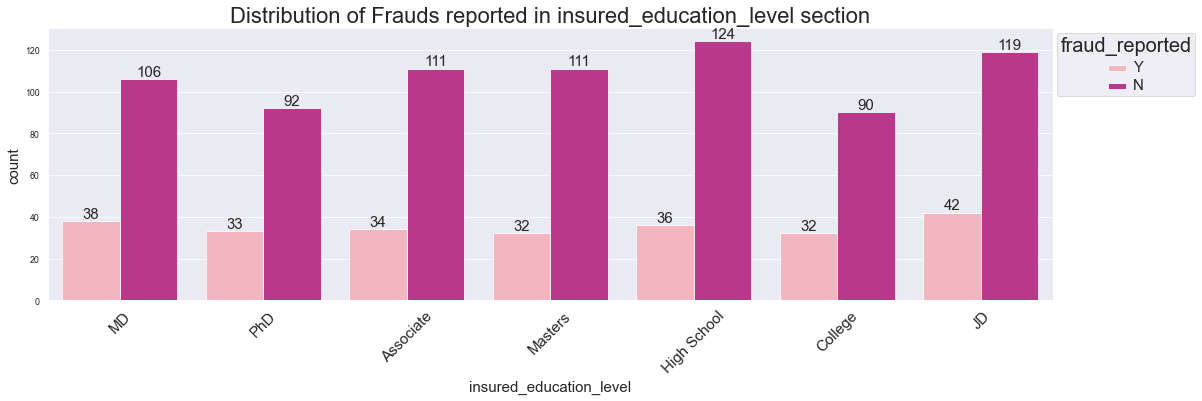

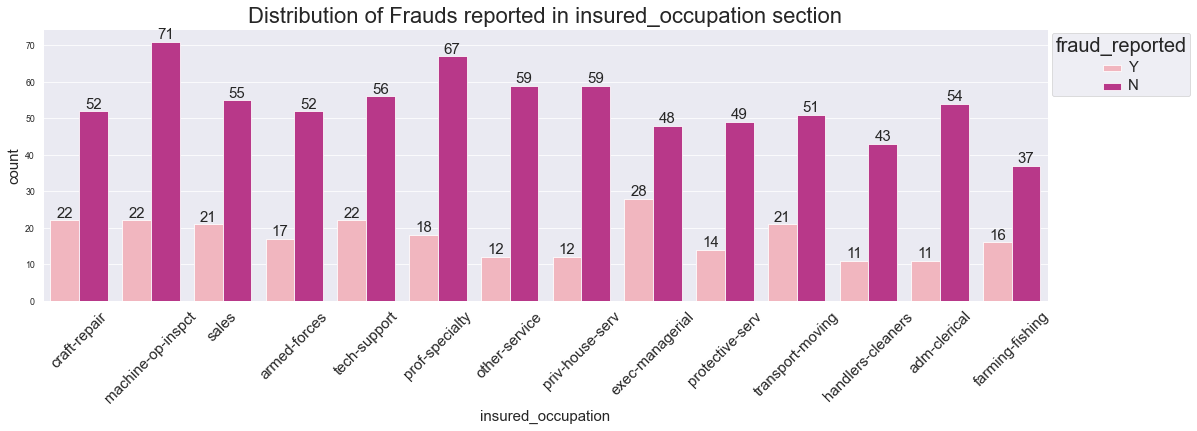

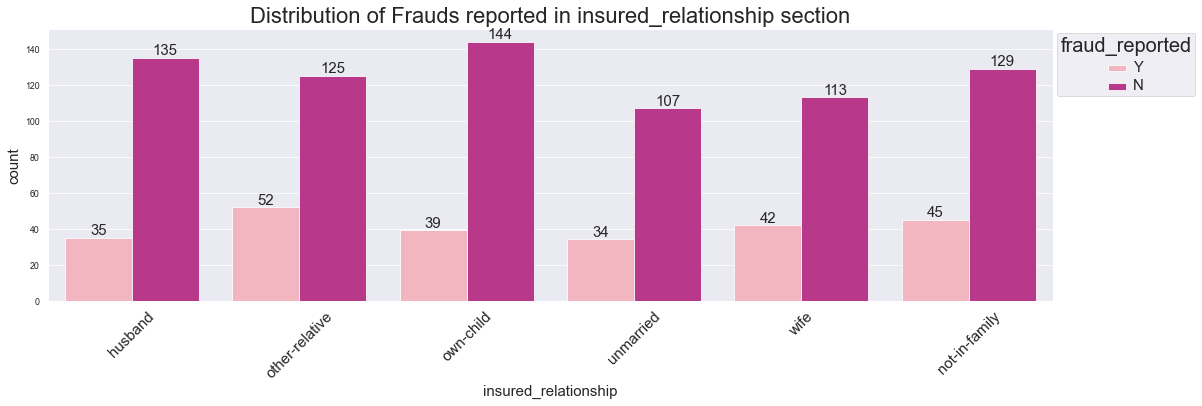

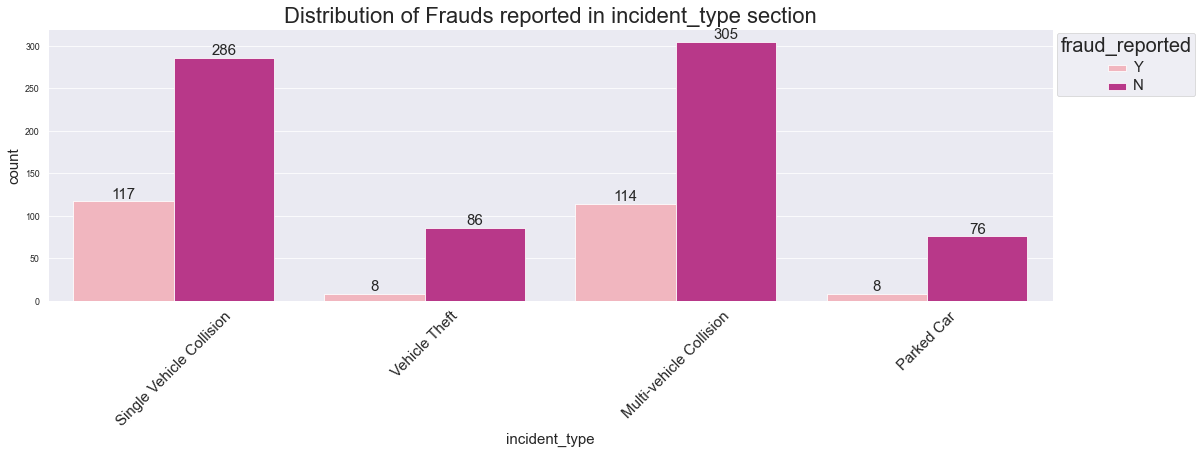

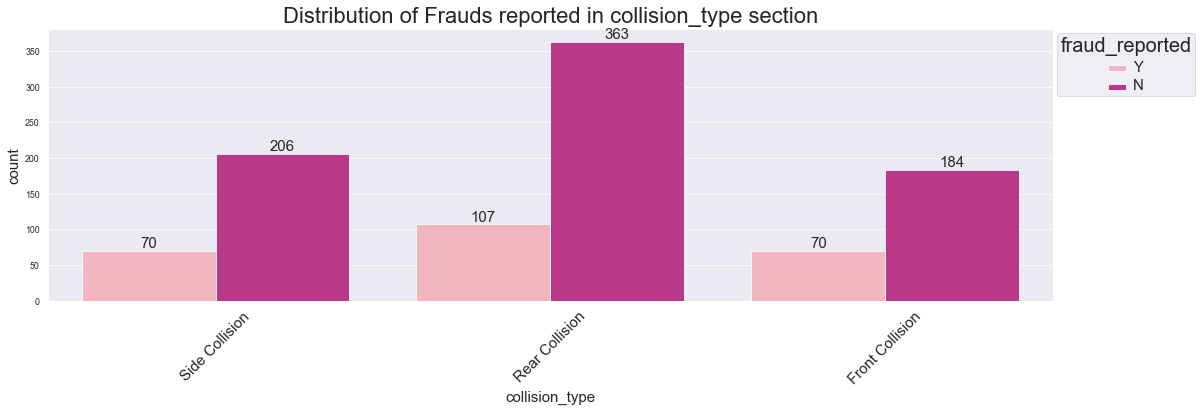

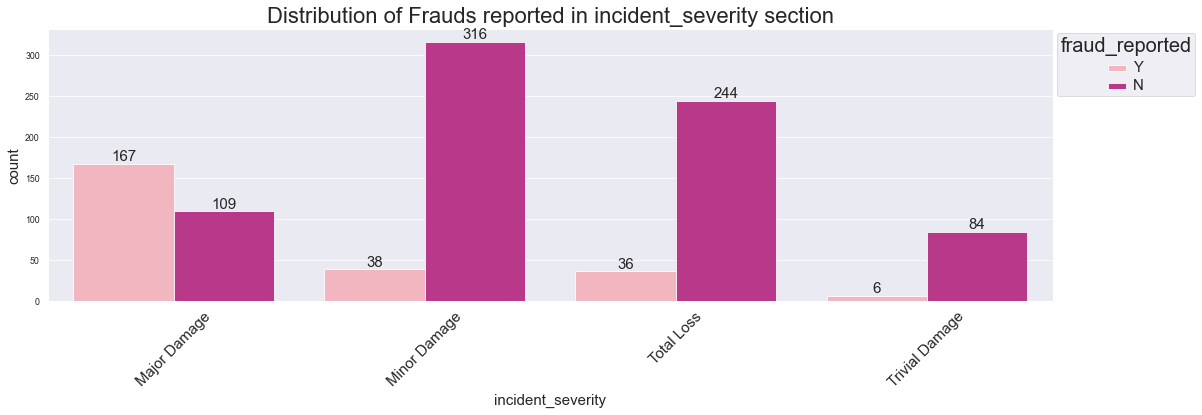

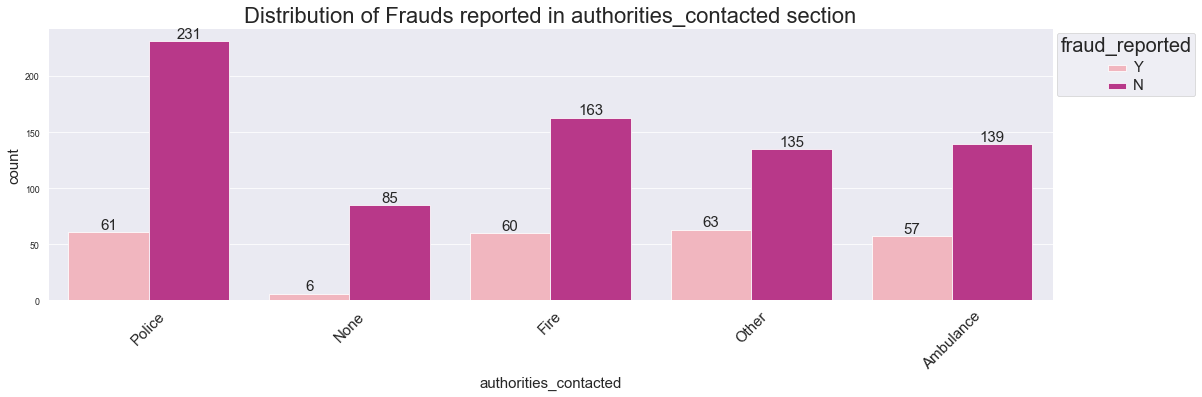

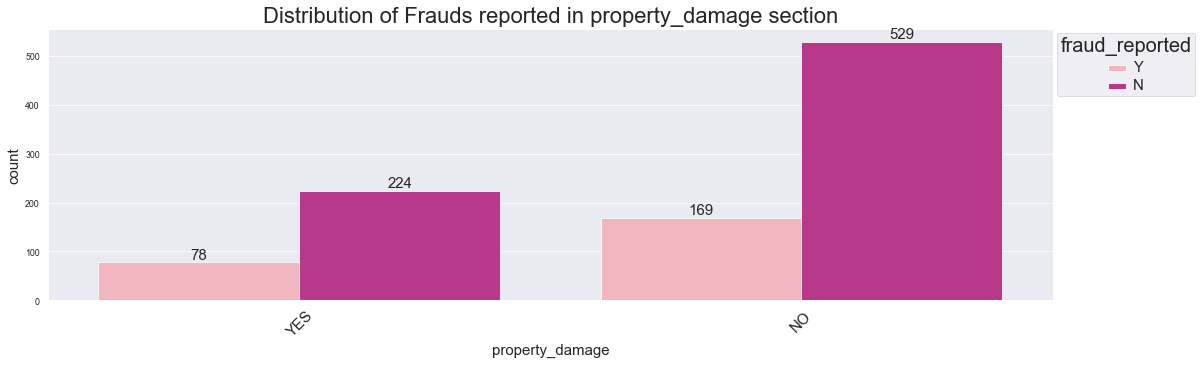

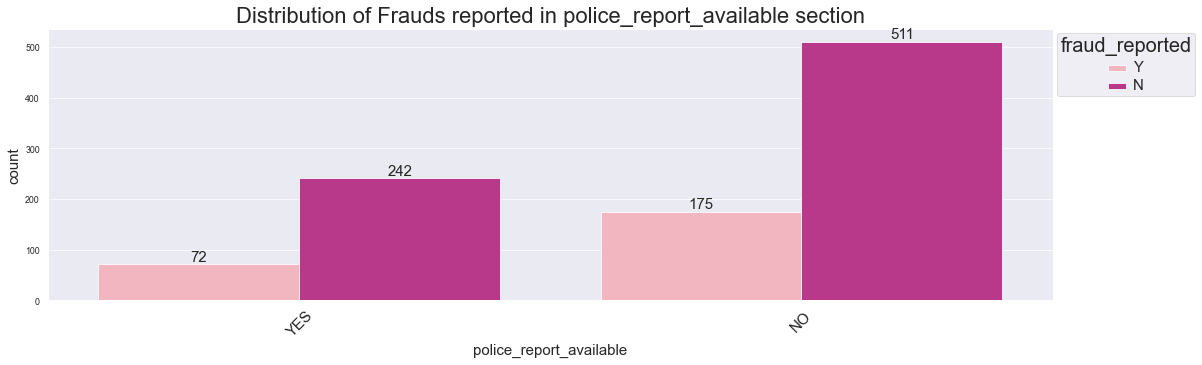

In [233]:
for item in data1_cat[['policy_csl','insured_sex','umbrella_limit','insured_education_level','insured_occupation','insured_relationship',
            'incident_type','collision_type','incident_severity','authorities_contacted','property_damage',
            'police_report_available']].columns:
    print(' ')
    plt.figure(figsize=(18,5))
    plt.xticks(fontsize = 15, rotation=45)
    plt.ylabel(ylabel = 'Count', fontsize = 15)
    plt.xlabel(xlabel = item, fontsize = 15)
    plt.title(f"Distribution of Frauds reported in {item} section",fontsize=22)
    ax = sns.countplot(x=item,hue='fraud_reported',data=data1_cat, palette='RdPu')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0], fontsize = 15);
    ax.bar_label(ax.containers[1], fontsize = 15);
    plt.setp(ax.get_legend().get_title(), fontsize='20')
    plt.setp(ax.get_legend().get_texts(), fontsize='15') 
    plt.show()

## Observation :
- **Whenever there is major damage to the vehicle, there are chances of hi fraudelent insurance claims.**

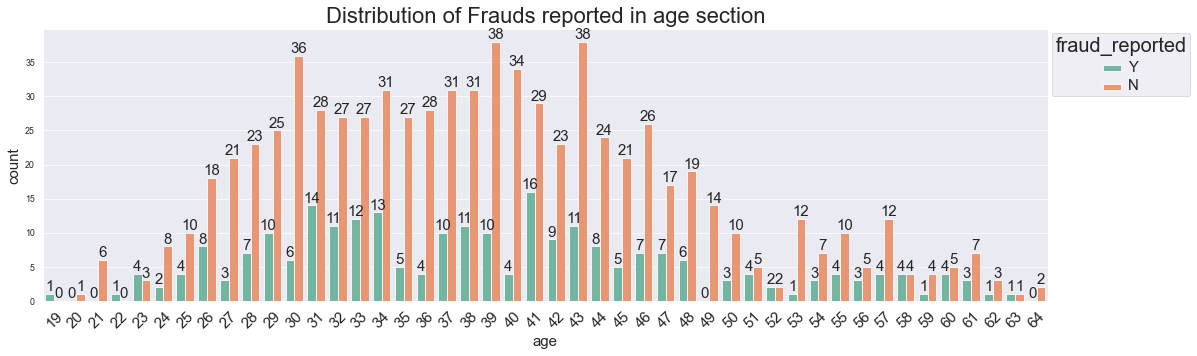

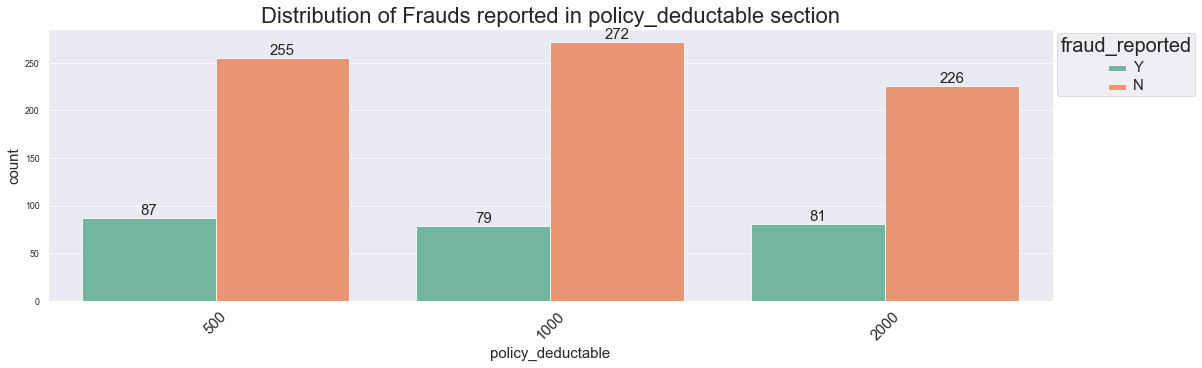

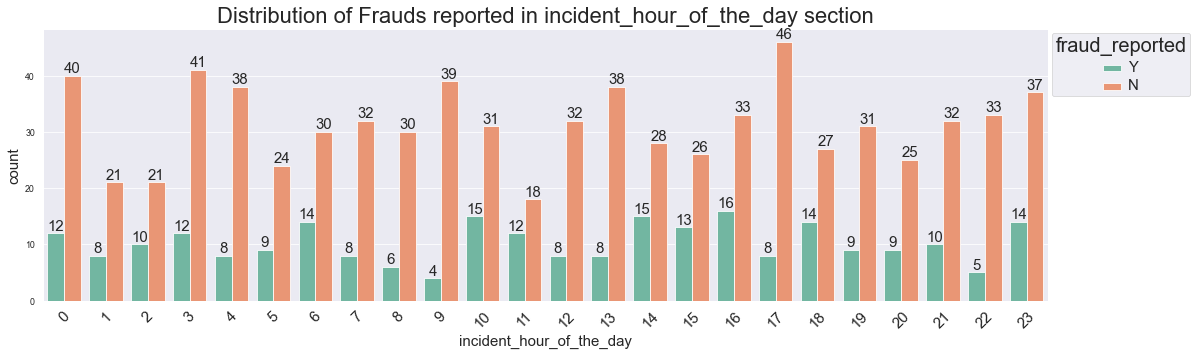

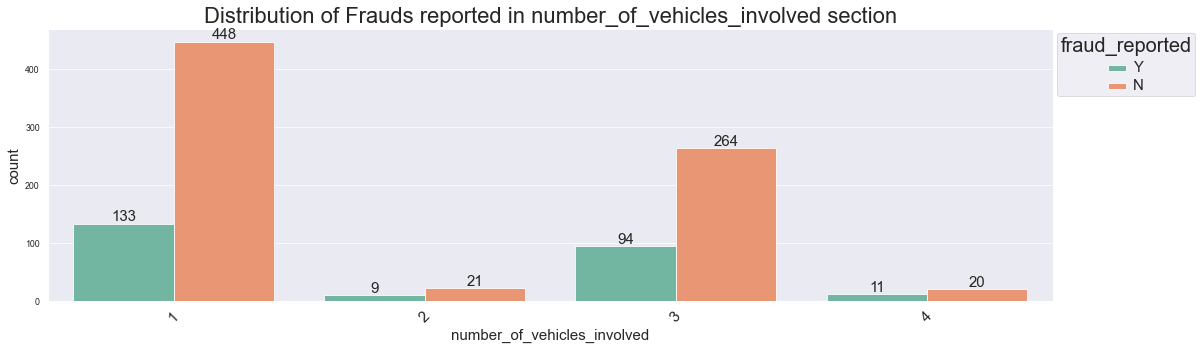

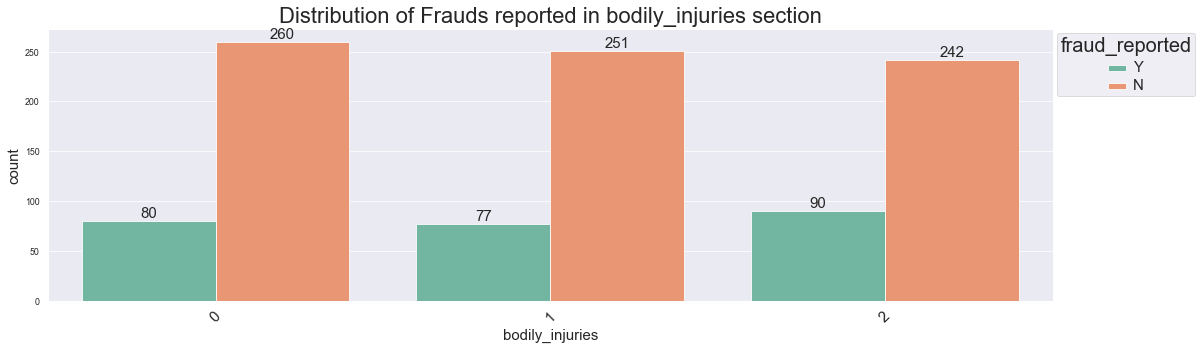

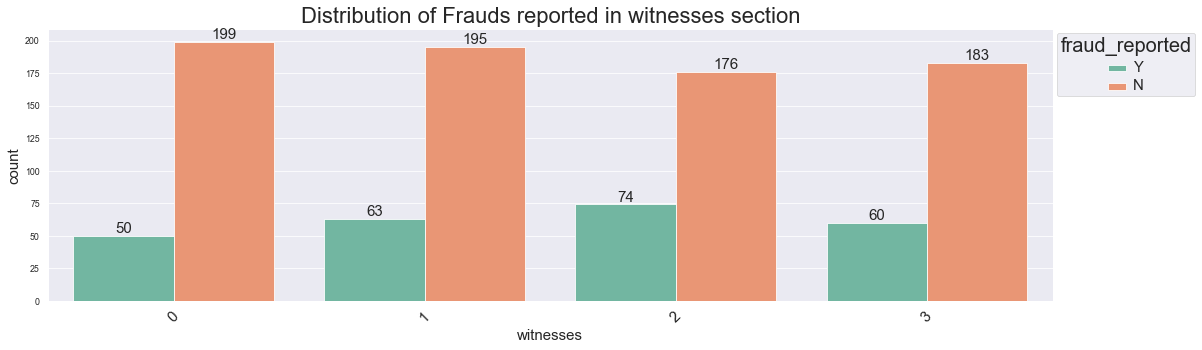

In [284]:
for item in ['age', 'policy_deductable', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses']:
    print(' ')
    plt.figure(figsize=(18,5))
    plt.xticks(fontsize = 15, rotation=45)
    plt.ylabel(ylabel = 'Count', fontsize = 15)
    plt.xlabel(xlabel = item, fontsize = 15)
    plt.title(f"Distribution of Frauds reported in {item} section",fontsize=22)
    ax = sns.countplot(x=item,hue='fraud_reported',data=data_eda, palette='Set2')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0], fontsize = 15);
    ax.bar_label(ax.containers[1], fontsize = 15);
    plt.setp(ax.get_legend().get_title(), fontsize='20')
    plt.setp(ax.get_legend().get_texts(), fontsize='15') 
    plt.show()

## Observation :
- **The age group who are doing most of the fraudulent insurance claims is between 25 to 48 years of age.**
- **The chances of fradulent insurance claims are high Whenever there are 1 or 3 vehicles involved in an accident..**

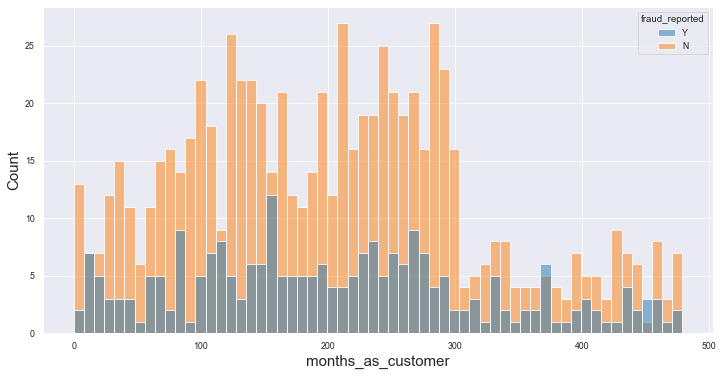

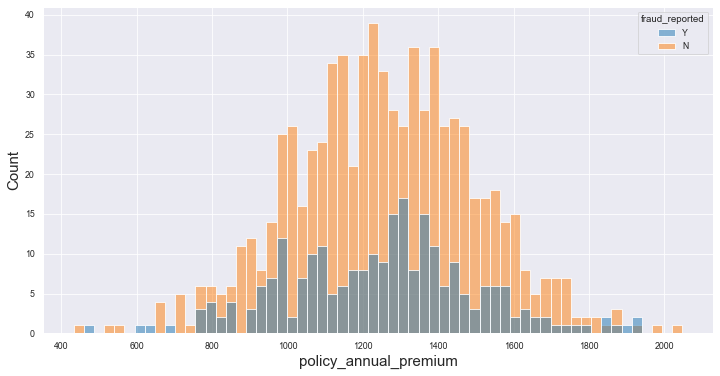

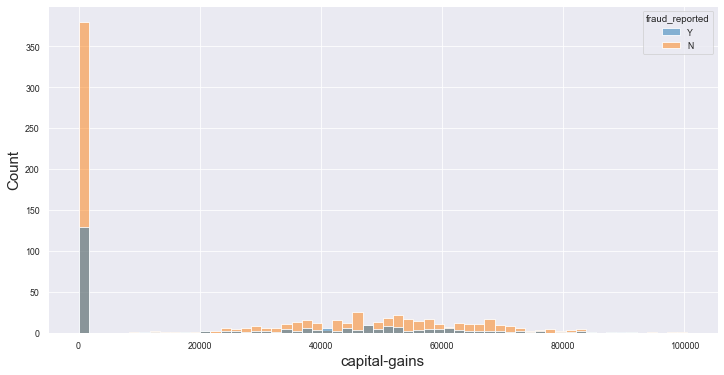

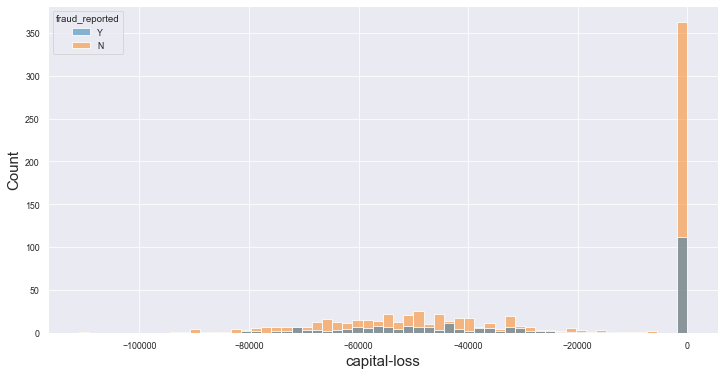

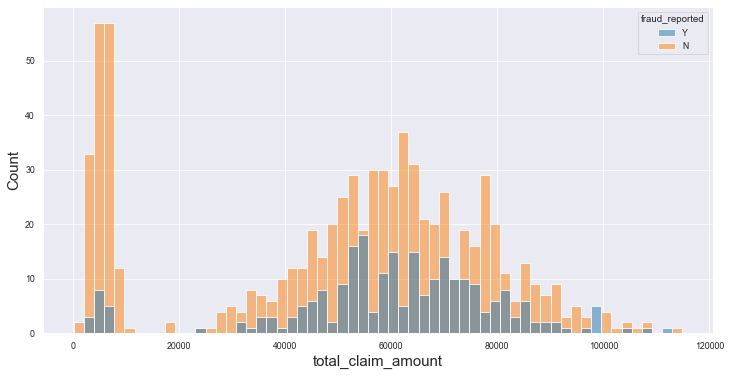

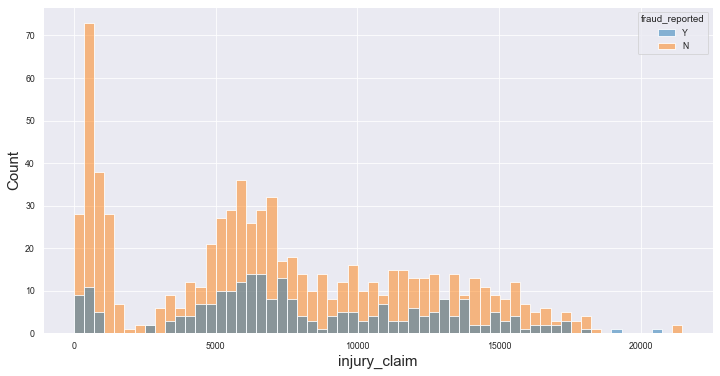

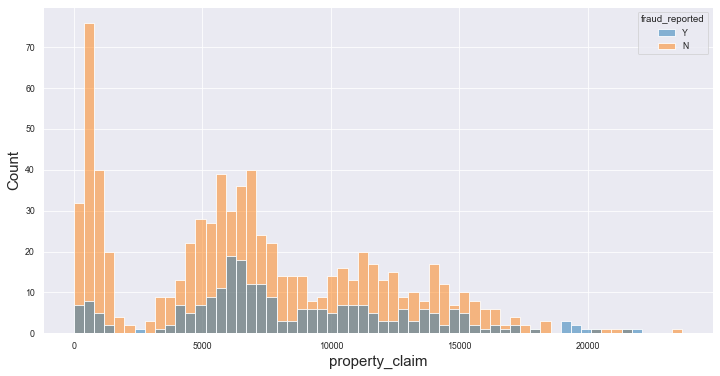

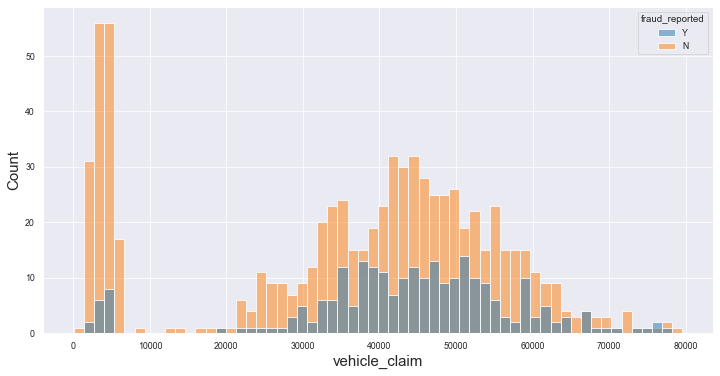

In [309]:
for item in ['months_as_customer','policy_annual_premium', 'capital-gains',
    'capital-loss','total_claim_amount', 'injury_claim',
    'property_claim','vehicle_claim']:
    
    print(' ')
    plt.figure(figsize=(12,6))
    sns.histplot(data_eda, x=item, bins=60, hue="fraud_reported")
    plt.ylabel(ylabel = 'Count', fontsize = 15)
    plt.xlabel(xlabel = item, fontsize = 15)
#     sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Observation :
- **There is very less chances of fradulent claims when the customers relation is older than 300 months.**
- **Those who pay annual policy premium in the range of 1100 - 1500, the chances of them being doing fradulent claims is higher.**
- **Whenever the Total Claim amount, Injury claim, property claim & vehicle claim are in the range of 4000-9000. ther is a high chance of claim being a fradulent one.**

# Correlation check

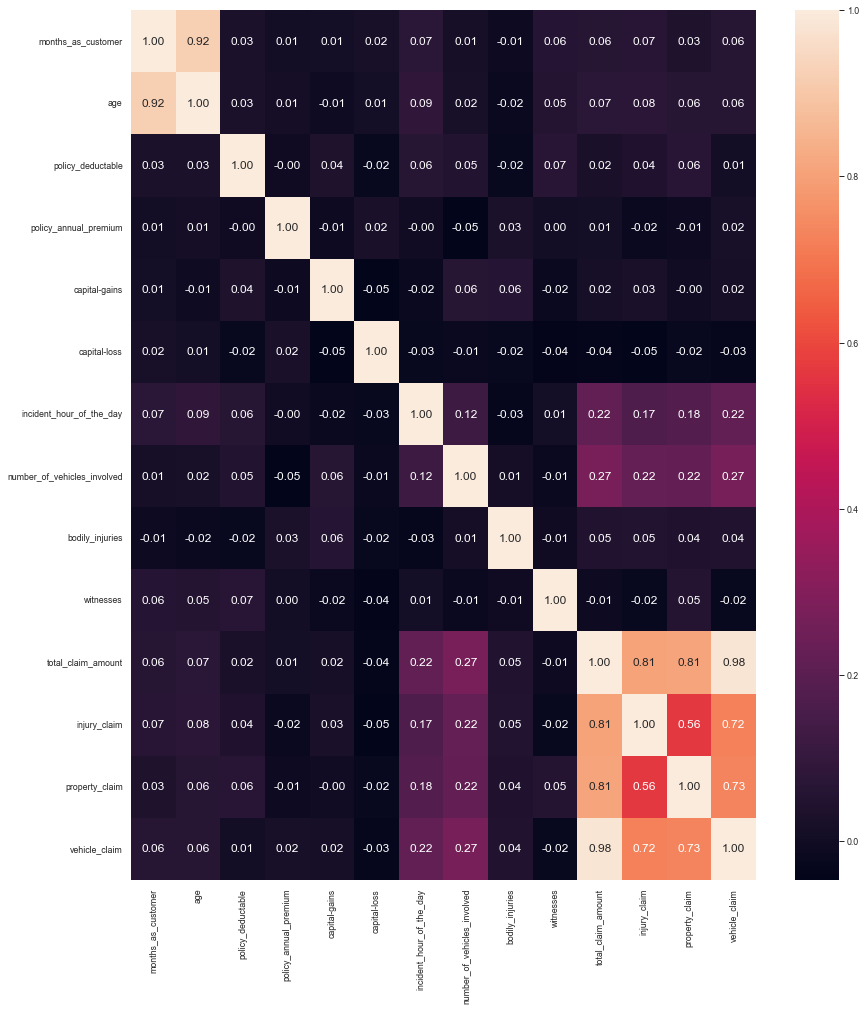

In [241]:
plt.figure(figsize=(14,16))
sns.heatmap(data1[num_cols].corr(),annot=True, fmt = ".2f", annot_kws={'size':12});
plt.show()

## Observation :
- **Age & month as a customer bothe features are highly correlated.**
- **Total Claim amount has high correlation with injury claim, property claim & vehicle claim.**

In [242]:
data2 = data1.copy()

## Skewness check

In [243]:
data2[num_cols].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

## Observation :
- **All Features are within the skewness limit of +/-0.65.**

In [ ]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(method='yeo-johnson', standardize=False)
# x = pt.fit_transform(data2[num_cols])
# x = pd.DataFrame(x, columns=data2[num_cols].columns)
# x.skew()

## Outlier check

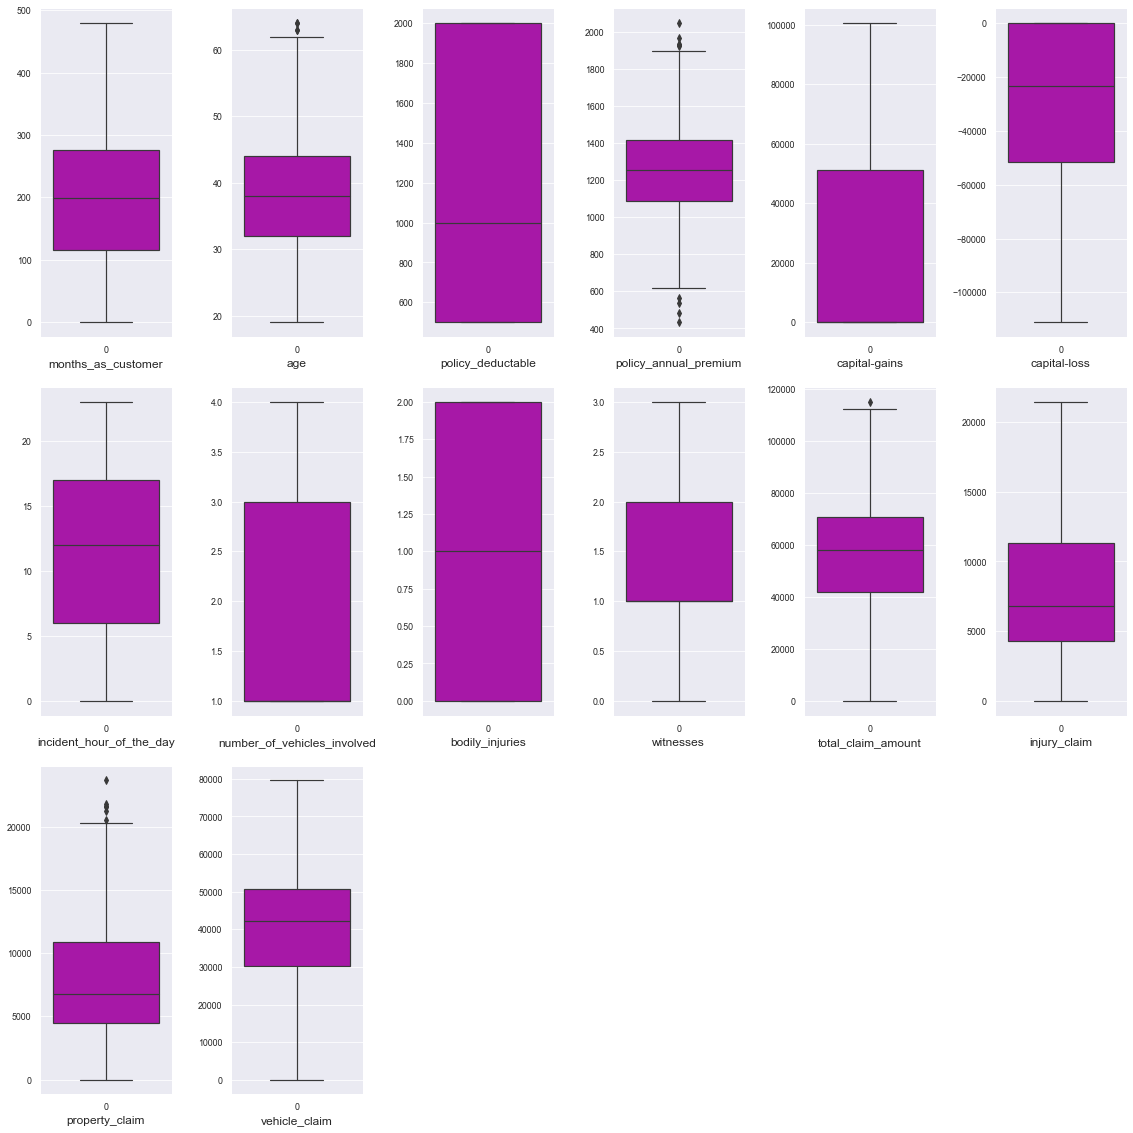

In [248]:
plt.figure(figsize=(16,16))
plotnumber=1
for col in num_cols:
    if plotnumber<=len(num_cols):
        ax=plt.subplot(3,6,plotnumber)
        sns.boxplot(data2[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

## Observation :
- **No Feature has major outlier present in them.**

## Standard Scaling

In [250]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_feat = pd.DataFrame(scaler.fit_transform(data2.drop('fraud_reported', axis=1)), columns = data2.drop('fraud_reported', axis=1).columns)
df_tgt = data2['fraud_reported']

# Multi Collinearity check

In [251]:
x_check = df_feat[num_cols]
model = sm.OLS(df_tgt, sm.add_constant(x_check)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         fraud_reported   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.975
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           0.000273
Time:                        19:36:04   Log-Likelihood:                -558.67
No. Observations:                1000   AIC:                             1145.
Df Residuals:                     986   BIC:                             1214.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [252]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = x_check.columns
vif["VIF"] = [variance_inflation_factor(x_check.values, i) for i in range(x_check.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,total_claim_amount,inf
11,injury_claim,inf
12,property_claim,inf
13,vehicle_claim,inf
1,age,6.785380
0,months_as_customer,6.772301
7,number_of_vehicles_involved,1.095104
6,incident_hour_of_the_day,1.066956
2,policy_deductable,1.021707
9,witnesses,1.021424


## **As identified in correlation matrix heatmap.. there is multicollinearity present in the data.**

In [253]:
df_feat1 = x_check.drop(['total_claim_amount'], axis=1)

vif = pd.DataFrame()
vif["variables"] = df_feat1.columns
vif["VIF"] = [variance_inflation_factor(df_feat1.values, i) for i in range(df_feat1.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,age,6.785380
0,months_as_customer,6.772301
12,vehicle_claim,3.229768
11,property_claim,2.230159
10,injury_claim,2.126948
7,number_of_vehicles_involved,1.095104
6,incident_hour_of_the_day,1.066956
2,policy_deductable,1.021707
9,witnesses,1.021424
4,capital-gains,1.013029


### As the VIF value for all the features are within limits of 10VIF. It is good to go.. 

In [254]:
df_feat.drop('total_claim_amount', axis = 1, inplace =True)

## Checking for Data Imbalance

In [255]:
df_tgt.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [256]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(0.75)
X, y_class = oversample.fit_resample(df_feat, df_tgt)

In [257]:
y_class.value_counts()

0    753
1    564
Name: fraud_reported, dtype: int64

# Classification Model Selection

In [258]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
#         print('\n \n Train Classification report \n', classification_report(y_train,y_pred, digits=2))
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, X, y_class, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,X, y_class, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

In [259]:
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
gnb = GaussianNB()
knc = KNeighborsClassifier()
lgr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
svc = SVC(probability=True)

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Decision Tree Classifier model..
 
Best Random_state number for splitting the data is:  54
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 80.91%
Confusion Matrix :

[[159  25]
 [ 38 108]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       184
           1       0.81      0.74      0.77       146

    accuracy                           0.81       330
   macro avg       0.81      0.80      0.80       330
weighted avg       0.81      0.81      0.81       330

Cross Validation score at best cv=10 is : 76.78%


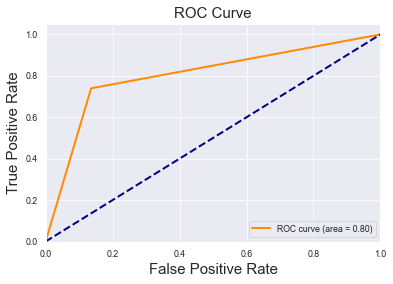

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Extra Trees Classifier model..
 
Best Random_state number for splitting the data is:  95
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 91.21%
Confusion Matrix :

[[181  10]
 [ 19 120]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       191
           1       0.92      0.86      0.89       139

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

Cross Validation score at best cv=10 is : 88.55%


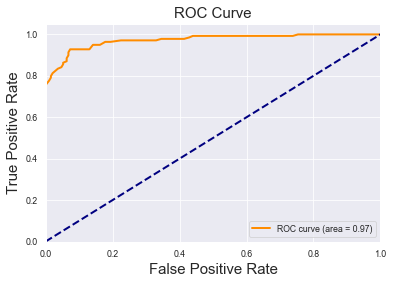

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Gaussian NB Classifier model..
 
Best Random_state number for splitting the data is:  113
 
Accuracy score for Train : 61.20%
Accuracy score for Test : 61.21%
Confusion Matrix :

[[ 77 110]
 [ 18 125]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.81      0.41      0.55       187
           1       0.53      0.87      0.66       143

    accuracy                           0.61       330
   macro avg       0.67      0.64      0.60       330
weighted avg       0.69      0.61      0.60       330

Cross Validation score at best cv=4 is : 59.91%


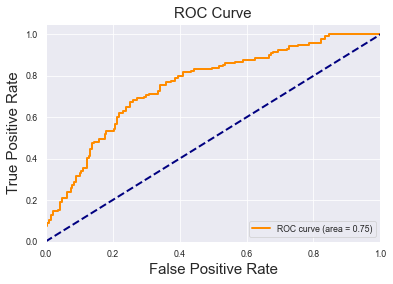

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for KNeighbors Classifier model..
 
Best Random_state number for splitting the data is:  123
 
Accuracy score for Train : 72.95%
Accuracy score for Test : 70.91%
Confusion Matrix :

[[102  82]
 [ 14 132]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.88      0.55      0.68       184
           1       0.62      0.90      0.73       146

    accuracy                           0.71       330
   macro avg       0.75      0.73      0.71       330
weighted avg       0.76      0.71      0.70       330

Cross Validation score at best cv=7 is : 67.28%


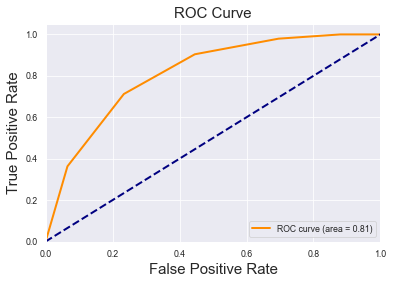

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Logistic Regression model..
 
Best Random_state number for splitting the data is:  79
 
Accuracy score for Train : 63.53%
Accuracy score for Test : 63.33%
Confusion Matrix :

[[138  49]
 [ 72  71]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.66      0.74      0.70       187
           1       0.59      0.50      0.54       143

    accuracy                           0.63       330
   macro avg       0.62      0.62      0.62       330
weighted avg       0.63      0.63      0.63       330

Cross Validation score at best cv=4 is : 59.99%


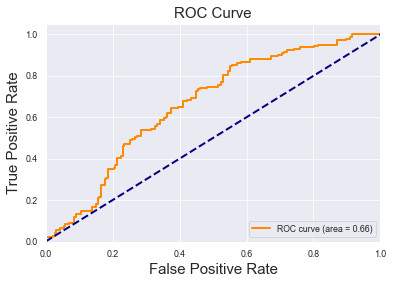

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Random Forest Classifier model..
 
Best Random_state number for splitting the data is:  49
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 86.67%
Confusion Matrix :

[[183  11]
 [ 33 103]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       194
           1       0.90      0.76      0.82       136

    accuracy                           0.87       330
   macro avg       0.88      0.85      0.86       330
weighted avg       0.87      0.87      0.86       330

Cross Validation score at best cv=11 is : 84.69%


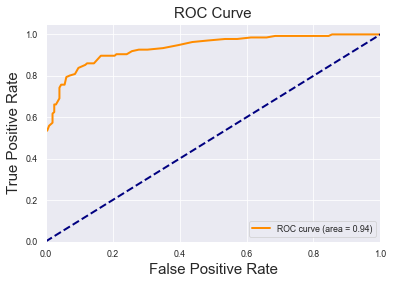

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Gradient Boosting Classifier model..
 
Best Random_state number for splitting the data is:  95
 
Accuracy score for Train : 92.50%
Accuracy score for Test : 88.18%
Confusion Matrix :

[[173  18]
 [ 21 118]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       191
           1       0.87      0.85      0.86       139

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

Cross Validation score at best cv=11 is : 84.61%


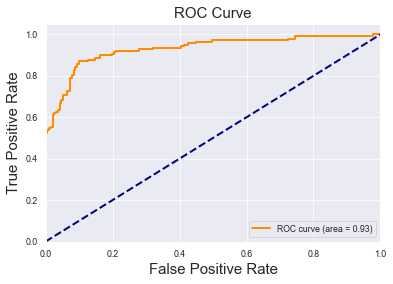

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Bagging Classifier model..
 
Best Random_state number for splitting the data is:  123
 
Accuracy score for Train : 98.18%
Accuracy score for Test : 84.55%
Confusion Matrix :

[[169  15]
 [ 36 110]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       184
           1       0.88      0.75      0.81       146

    accuracy                           0.85       330
   macro avg       0.85      0.84      0.84       330
weighted avg       0.85      0.85      0.84       330

Cross Validation score at best cv=6 is : 83.01%


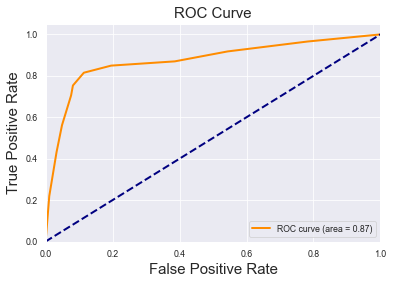

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Support vector Classifier model..
 
Best Random_state number for splitting the data is:  59
 
Accuracy score for Train : 92.50%
Accuracy score for Test : 83.64%
Confusion Matrix :

[[177  24]
 [ 30  99]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       201
           1       0.80      0.77      0.79       129

    accuracy                           0.84       330
   macro avg       0.83      0.82      0.83       330
weighted avg       0.84      0.84      0.84       330

Cross Validation score at best cv=7 is : 82.54%


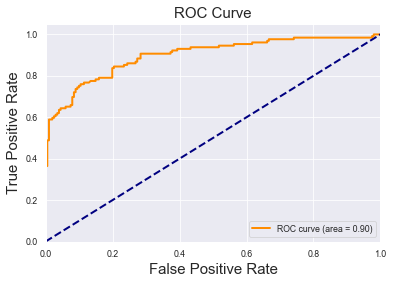

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
7,Bagging Classifier,123,98.18,84.55,0.10,6,83.010585
8,Support vector Classifier,59,92.50,83.64,1.10,7,82.543703
2,Gaussian NB Classifier,113,61.20,61.21,1.30,4,59.907663
5,Random Forest Classifier,49,100.00,86.67,1.90,11,84.688694
1,Extra Trees Classifier,95,100.00,91.21,2.12,10,88.554245
4,Logistic Regression,79,63.53,63.33,3.34,4,59.985263
6,Gradient Boosting Classifier,95,92.50,88.18,3.57,11,84.607843
3,KNeighbors Classifier,123,72.95,70.91,3.63,7,67.278188
0,Decision Tree Classifier,54,100.00,80.91,3.75,10,76.782905


In [260]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [dtc,etc,gnb,knc,lgr,rfc,gbc,bgc,svc]
models_name = ['Decision Tree Classifier','Extra Trees Classifier','Gaussian NB Classifier','KNeighbors Classifier','Logistic Regression',
               'Random Forest Classifier','Gradient Boosting Classifier', 'Bagging Classifier', 'Support vector Classifier']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(X, y_class, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
#     print(cv_fold)
#     print(score_diff)
    dummy_count+=1

    
### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

#### Observation
We will select ExtraTreesClassifier model as it has,
1. Maximum area under AUC ROC Curve.
2. Maximum Test accuracy & cross validation score amongst all other classifiaction models.

# Hyper parameter Tuning for best model selected..

In [261]:
x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = 95)

In [262]:
param_grid_etc = {'n_estimators':[400,500,600,800,900],
                  'criterion':["gini", "entropy"],
                  'max_depth':[4,5,6,7,8],
                  'min_samples_split':[3,4,5,6],
                  'min_samples_leaf':[1, 2, 3]
                 }

In [263]:
etc_grid = GridSearchCV(estimator = etc,
                       param_grid = param_grid_etc,
                       verbose = 2,
                       scoring = 'accuracy')

In [265]:
etc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.7s
[CV] END

[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_sp

[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.4s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_sp

[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_sp

[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_sp

[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=   1.1s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_sp

[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.9s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_sp

[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.5s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_sp

[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.8s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_sp

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=4, min_sam

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_sam

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   0.7s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=4, min_sam

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_sam

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=5, min_sam

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_sam

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=5, min_sam

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.6s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   0.7s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_sam

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, min_sam

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=6, min_sam

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_sam

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, min_sam

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, min_sam

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=7, min_sam

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_sam

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, min_sam

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.9s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END criterion=entropy, max_depth=7, min_sam

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_sam

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_sam

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, min_sam

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   0.9s
[CV] END criterion=entropy, max_depth=8, min_sam

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [400, 500, 600, 800, 900]},
             scoring='accuracy', verbose=2)

In [266]:
etc_grid.best_score_

0.8318361277752141

In [267]:
etc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 800}

In [268]:
etc_final = ExtraTreesClassifier(criterion='gini',
                                 max_depth=8,
                                 min_samples_leaf=1,
                                 min_samples_split=3,
                                 n_estimators= 800)

In [269]:
etc_final.fit(x_train,y_train)
y_pred=etc_final.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.8909090909090909


Confusion Matrix :

[[179  12]
 [ 24 115]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       191
           1       0.91      0.83      0.86       139

    accuracy                           0.89       330
   macro avg       0.89      0.88      0.89       330
weighted avg       0.89      0.89      0.89       330

Cross Validation score at best cv = 10 is : 85.29%


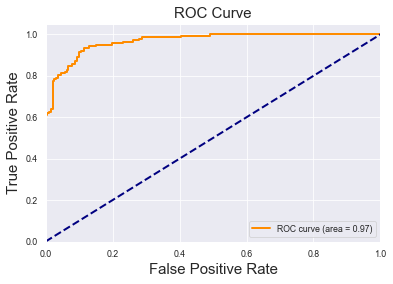

In [272]:
confusion_matrix_c(y_test, y_pred)
print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))

cv_score = cross_val_score(etc_final,X, y_class, cv=10, scoring="accuracy").mean()
print(f"Cross Validation score at best cv = 10 is : {cv_score*100:.2f}%")
y_predict_probabilities = etc_final.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

### After tuning the model the acuuracy score & Cross validation score decreased.

# Model Saving & predicting on test set.

In [273]:
filename='Insurance_Claim.pkl'
pickle.dump(etc,open(filename,'wb'))

In [274]:
model =pickle.load(open('Insurance_Claim.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
325,0,0
326,0,0
327,0,0
328,0,0
